In [124]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from datetime import datetime
import seaborn as sns
import warnings
from sklearn import*
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

warnings.filterwarnings('ignore')

In [75]:
#ilk çıktımız,train ve test datasetlerinin boyutlarını elde ettik
train = pd.read_csv('train-1.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [76]:
#iki verisetinin birleştirilmesi

df=pd.concat([train, test], axis=0).reset_index(drop=True)

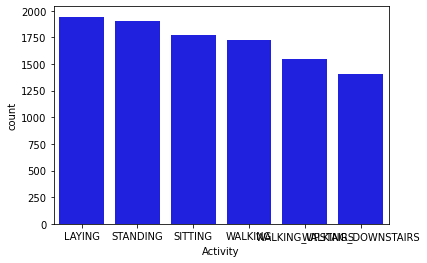

In [77]:
#ikinci çıktımız,birleştirdiğimiz verisetinin görselleştirilmesi
ax =sns.countplot(x=("Activity"),
data=df, color="blue", order=df['Activity'].value_counts().index)

In [78]:
#verisetinden bağımlı değişken olan 'activity' kısmını atıyoruz
X = df.drop(['Activity','subject'], axis = 1)
y=df.Activity

In [79]:
#Verimizi StandardScaler ile ölçeklendirdik
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(X)


In [80]:
from sklearn.decomposition import PCA


In [81]:
#principal component analizi
pca = PCA(n_components=100)
pca.fit(scaled_x)
X_pca=pca.transform(scaled_x)


In [34]:
#PCA için optimum component sayısını belirleme
"""
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [35]:
"""
pca.n_components_

100

In [11]:
X.shape

(10299, 561)

In [12]:
scaled_x.shape

(10299, 561)

In [13]:
X_pca.shape

(10299, 100)

In [82]:
#modelimizi train ve test kısımlarına bölüyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.30, random_state = 42)

In [136]:
#KNN classifierı oluşturma
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
classifier = KNeighborsClassifier(algorithm= 'auto',n_neighbors= 6, p= 1, weights= 'distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

In [137]:
#tahmin yapma
y_pred = classifier.predict(X_test)

In [119]:
y_pred

array(['WALKING', 'LAYING', 'STANDING', ..., 'SITTING', 'STANDING',
       'WALKING_UPSTAIRS'], dtype=object)

In [111]:
y_test

5804             WALKING
3688              LAYING
7360            STANDING
3437            STANDING
8193             WALKING
              ...       
4786              LAYING
164     WALKING_UPSTAIRS
6857             SITTING
2715            STANDING
9187    WALKING_UPSTAIRS
Name: Activity, Length: 3090, dtype: object

In [138]:
#üçüncü çıktımız
#tahmin doğrulumuz için gerekli çıktıları ürettik
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred,average='micro')
print('Confusion matrix:')
print(cm)
print('accuracy score:')
print(acc)
print('f1 score: ')
print(f1)
print("Classification Report:")
crep=classification_report(y_test, y_pred)

print(crep)

Confusion matrix:
[[592   2   3   0   0   0]
 [  3 494  63   0   0   3]
 [  0  32 515   0   0   0]
 [  0   0   0 536   2   1]
 [  0   0   0   6 410   4]
 [  0   0   0   1   0 423]]
accuracy score:
0.9611650485436893
f1 score: 
0.9611650485436893
Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       597
           SITTING       0.94      0.88      0.91       563
          STANDING       0.89      0.94      0.91       547
           WALKING       0.99      0.99      0.99       539
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      1.00      0.99       424

          accuracy                           0.96      3090
         macro avg       0.96      0.96      0.96      3090
      weighted avg       0.96      0.96      0.96      3090



<AxesSubplot:>

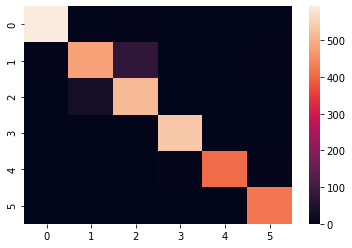

In [69]:
#dördüncü çıktımız,seaborn ile heatmap oluşturduk
sns.heatmap(cm)

In [132]:
#elbow metodu ile optimum k seçimi
def Elbow(K): 
    test_error = [] 
    
    for i in K:
        classifier=KNeighborsClassifier(algorithm='auto',n_neighbors= i, p= 1,weights= 'distance')
        classifier.fit(X_train, y_train)
        new_pred = classifier.predict(X_test)
        new_pred = f1_score(new_pred, y_test,average='micro')
        error = 1 - new_pred
        test_error.append(error)
        
    return test_error

In [133]:
k = range(1,10)
test = Elbow(k)

Text(0, 0.5, 'Errors')

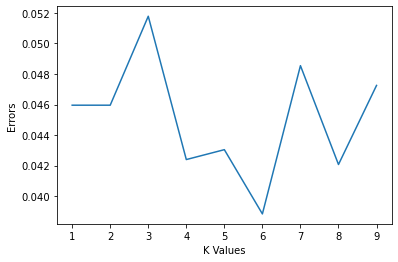

In [134]:
plt.plot(k, test)
plt.xlabel('K Values')
plt.ylabel('Errors')

Text(0, 0.5, 'Accuracy')

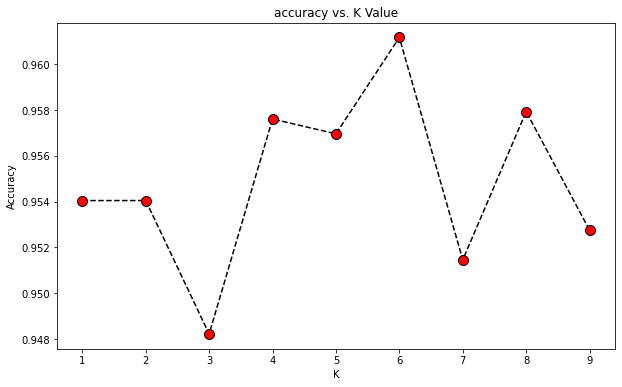

In [135]:
#optimum k seçiminin accuracy'e göre yapılması
acc_arr=[]
for i in range(1,10):
    n =KNeighborsClassifier(algorithm= 'auto',n_neighbors= i, p= 1, weights= 'distance').fit(X_train,y_train)
    yh = n.predict(X_test)
    acc_arr.append(metrics.accuracy_score(y_test, yh))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc_arr,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
